# Lab01: Assignment
In this assignment you're required to find whether the given numbers are prime or not using sequential and parallel processing and then compare the performance of both

## 1. Sequential processing

In [20]:
from time import time

In [21]:
numbers = [15492781, 15492787, 15492803, 
           15492811, 15492810, 15492833, 
           15492859, 15502547, 15520301, 15527509]

In [22]:
def is_prime(number):
    """returns True if number 
    is prime, False otherwise"""
    for i in range(2, number):
        if number % i == 0:
            return False
    return True

    
if __name__ == "__main__":
    start = time()
    
    for number in numbers:
        if is_prime(number):
            print(f"{number} is prime")
        else:
            print(f"{number} is not prime")
                
    t_seq = time()
    print(f"Performance: {t_seq-start}")

15492781 is prime
15492787 is prime
15492803 is prime
15492811 is prime
15492810 is not prime
15492833 is prime
15492859 is prime
15502547 is prime
15520301 is prime
15527509 is prime
Performance: 53.92851901054382


## 2. Parallel processing

In [23]:
from multiprocessing import Process, Queue, current_process
from queue import Empty # exception to break from loop when the get(block=False) called on empty queue 

In [28]:
def check_prime_worker(job_queue):
    """worker function passed as target to Process"""
    while True:
        # your code here
        # 1. get next available number from queue
        try:
            number = job_queue.get(block=False)
            print(f"Process {current_process()} checks number {number}")
        except Empty:
            break
            
        # 2. print the number and whether it
        #    is prime or not, use is_prime()
        if is_prime(number):
            print(f"{number} is prime")
        else:
            print(f"{number} is not prime")
            
        # 3. use try/except to catch Empty exception 
        #    and quit the loop if no number remains in queue
        #    done in step 1

        
# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    print("hello")
    job_queue = Queue()
    
    t_par = []
    
    # number of workers 
    for N in range(1, len(numbers)+1):
        # preparing the jobs to be done by workers
        for number in numbers:
            job_queue.put(number)

        # your code here

        # 1. create list of processes of N process. Choose N in range of [1:len(numbers)]
        processes = [Process(target=check_prime_worker, args = (job_queue,)) for i in range(N)]

        # 2. record the start time 
        start = time()
        
        # 3. start each of the processes
        [p.start() for p in processes]

        # 4. call join on each of the processes
        [p.join() for p in processes]

        # 5. measure the performance and append to the list of records
        t_par.append(time()-start)
        
        # 6. close the processes
        [p.close() for p in processes]

hello


Bonus points will be given if you show/print the name of the process that did calculation for given number (use current_process() from multiprocessing module) 

In [29]:
print(t_par)

[0.18399930000305176, 0.37199974060058594, 0.2010021209716797, 0.19899892807006836, 0.24900245666503906, 0.3079969882965088, 0.3900017738342285, 0.4239985942840576, 0.45399928092956543, 0.47500061988830566]


## 3. Compare the performance of Sequential processing against Parallel processing 
Draw a simple 2D graph using matplotlib:
- X axis should be number of processes from part 2, i.e., it should have values: 1, 2, 3,.., len(numbers)
- Y axis should be ratio of "time for sequential processing" (t_seq) to a "time for parallel processing" (t_par[i-1]) when i processes are used.

Explain the results in a few sentences and what factors can affect it?

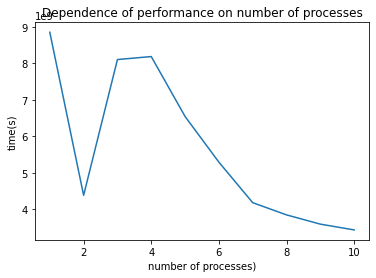

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y = list(map(lambda x: t_seq/x, t_par))
ax.plot(range(1, len(numbers)+1), y)

ax.set(xlabel='number of processes)', ylabel='time(s)',
       title='Dependence of performance on number of processes')

plt.show()